# 1. Perkenalan

- Nama : Steven Kusuma
- Batch : 015
- Dataset : Smoke Detection Dataset (https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset)
- Objective : membuat model Classification untuk smoke detection

- Heroku : https://fire-prediction-steven-kusuma.herokuapp.com/

Beberapa model yang akan dipakai di data classification ini adalah sebagai berikut :

- `Logistic Regression`
- `SVM`
- `Random Forest`
- `Gradient Boosting`

# 2. Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Data Loading

In [2]:
# Load Dataset

data = pd.read_csv('h8dsft_Milestone2P1_Steven_Kusuma.csv')
data

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [3]:
data.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [4]:
data.tail()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0
62629,62629,1655130051,19.299,16.52,643,400,13696,20543,936.676,0.57,0.59,3.90,0.607,0.014,5743,0


In [5]:
# Check Dataset - 1

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


Data terdiri dari 16 column :

- `16 Integer`

In [6]:
# Check Dataset - 2

data.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [7]:
# Check Missing Values

data.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

Tidak ada Missing Values

# 4. Exploratory Data Analysis

<AxesSubplot:xlabel='Fire Alarm', ylabel='count'>

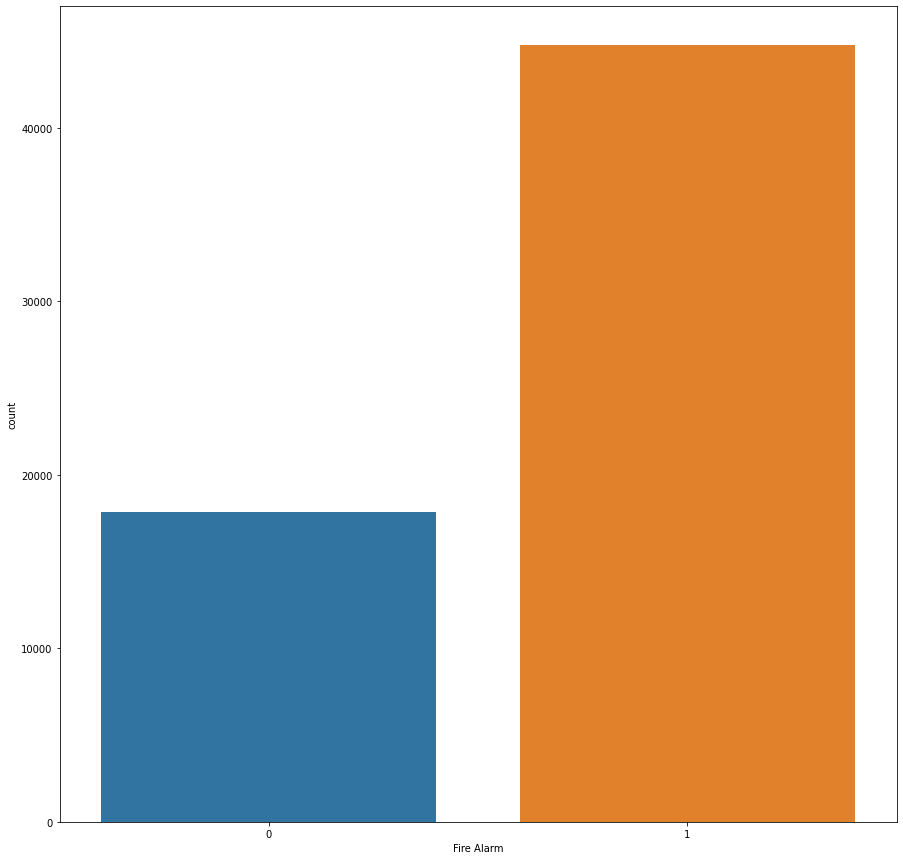

In [8]:
plt.figure(figsize=(15, 15))
sns.countplot(x=data["Fire Alarm"])

<AxesSubplot:>

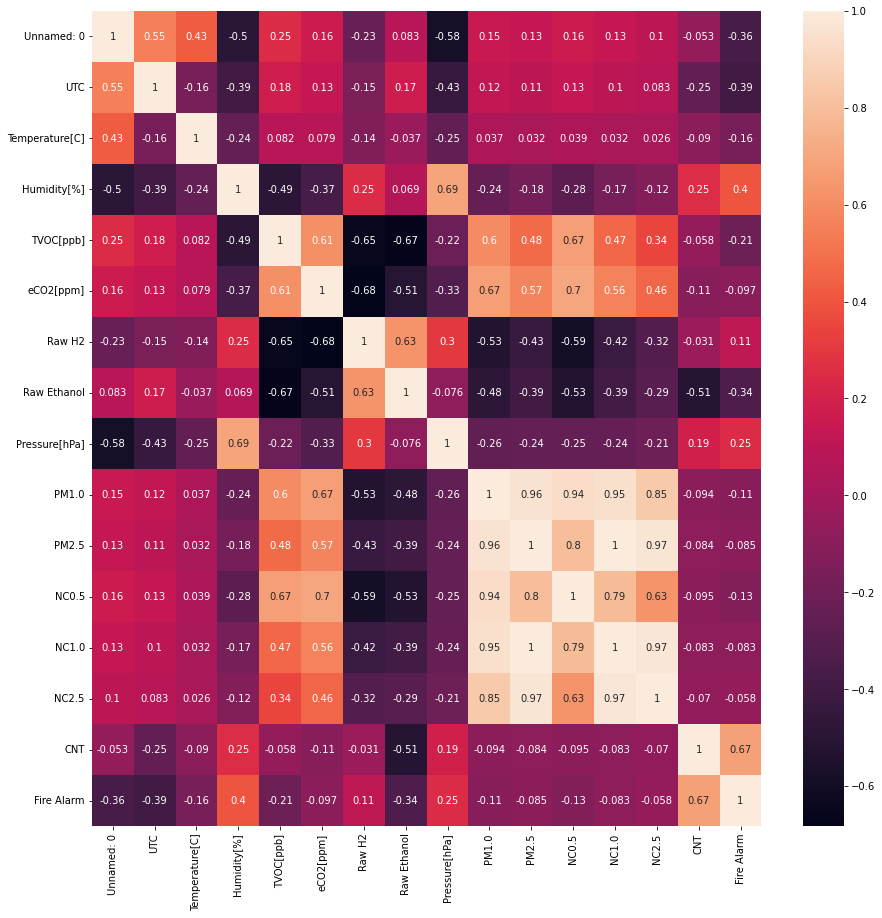

In [9]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True)

Dari correlation matrix nya terdapat 5 `features` yang korelasinya tinggi dengan `target` yaitu `Fire Alarm`.

5 `features` yakni :

- Temperature
- Humidity
- TVOC
- Raw Ethanol
- Pressure

Sisa column tidak akan dipakai, dan akan di drop. Karena tidak akan ber-efek ke model nanti.

In [10]:
data_final = data[['Temperature[C]',
 'Humidity[%]',
 'TVOC[ppb]',
 'Raw Ethanol',
 'Pressure[hPa]',
 'Fire Alarm']]

data_final

,Temperature[C],Humidity[%],TVOC[ppb],Raw Ethanol,Pressure[hPa],Fire Alarm
0,20.000,57.36,0,18520,939.735,0
1,20.015,56.67,0,18651,939.744,0
2,20.029,55.96,0,18764,939.738,0
3,20.044,55.28,0,18849,939.736,0
4,20.059,54.69,0,18921,939.744,0
...,...,...,...,...,...,...
62625,18.438,15.79,625,20569,936.670,0
62626,18.653,15.87,612,20588,936.678,0
62627,18.867,15.84,627,20582,936.687,0
62628,19.083,16.04,638,20566,936.680,0


In [11]:
data_final.to_csv('h8dsft_Milestone2P1_Steven_Kusuma_2.csv')

Fire Alarm :

0 : No fire

1 : Fire

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fire Alarm', ylabel='TVOC[ppb]'>

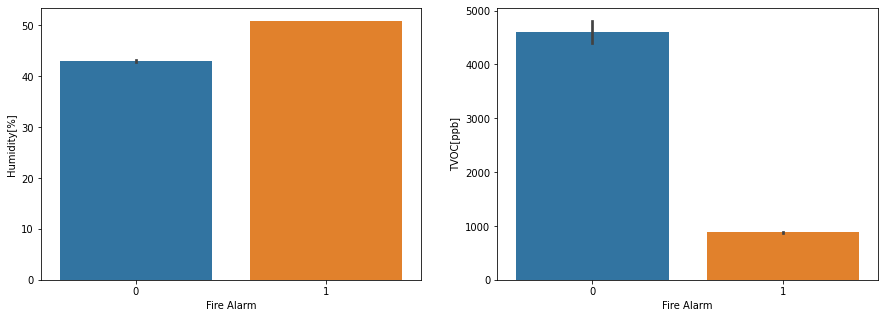

In [12]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.barplot(data['Fire Alarm'] , data['Humidity[%]'])
plt.subplot(122)
sns.barplot(data['Fire Alarm'] , data['TVOC[ppb]'])

1. Semakin tinggi `humidity %` akan trigger `Fire alarm`. Ini benar karena asap akan menaikkan humidity di udara.
2. Semakin rendah `Total Volatile Organic Compounds`, akan trigger `Fire alarm`.

# 5. Data Preprocessing

## 5.1. Get Data for Model Inference

In [13]:
# Get Data for model Inference

data_inf = data.sample(10, random_state=25)
data_inf

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
55506,55506,1654716551,47.460,26.61,12226,438,12797,19186,936.893,0.76,0.79,5.25,0.818,0.018,4364,0
57375,57375,1655124797,21.396,45.76,49,400,12828,20712,937.530,2.19,2.27,15.06,2.348,0.053,489,0
18511,18511,1654751842,20.067,47.30,1295,433,12894,19409,938.742,1.67,1.73,11.48,1.790,0.040,18511,1
9592,9592,1654742923,-4.624,58.15,718,707,12782,19548,939.174,2.19,2.28,15.09,2.353,0.053,9592,1
53386,53386,1654714431,27.560,47.22,97,400,12811,20624,937.343,1.84,1.91,12.64,1.970,0.045,2244,0
929,929,1654734260,27.059,51.24,0,400,13019,19934,939.754,0.25,0.26,1.74,0.272,0.006,929,0
32742,32742,1654769091,18.380,56.08,292,400,13117,19970,939.415,0.39,0.41,2.72,0.424,0.010,7748,1
38394,38394,1654774743,27.020,47.25,1164,529,12841,19438,938.882,1.62,1.68,11.16,1.740,0.039,13400,1
34370,34370,1654770719,19.610,65.53,628,558,12862,19634,939.210,2.49,2.59,17.15,2.674,0.060,9376,1
35570,35570,1654771919,23.390,55.31,967,680,12791,19503,939.097,2.34,2.43,16.10,2.511,0.057,10576,1


In [14]:
# Remove Inference-Set from Dataset

data_train_test = data.drop(data_inf.index)
data_train_test

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [15]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,55506,1654716551,47.460,26.61,12226,438,12797,19186,936.893,0.76,0.79,5.25,0.818,0.018,4364,0
1,57375,1655124797,21.396,45.76,49,400,12828,20712,937.530,2.19,2.27,15.06,2.348,0.053,489,0
2,18511,1654751842,20.067,47.30,1295,433,12894,19409,938.742,1.67,1.73,11.48,1.790,0.040,18511,1
3,9592,1654742923,-4.624,58.15,718,707,12782,19548,939.174,2.19,2.28,15.09,2.353,0.053,9592,1
4,53386,1654714431,27.560,47.22,97,400,12811,20624,937.343,1.84,1.91,12.64,1.970,0.045,2244,0
5,929,1654734260,27.059,51.24,0,400,13019,19934,939.754,0.25,0.26,1.74,0.272,0.006,929,0
6,32742,1654769091,18.380,56.08,292,400,13117,19970,939.415,0.39,0.41,2.72,0.424,0.010,7748,1
7,38394,1654774743,27.020,47.25,1164,529,12841,19438,938.882,1.62,1.68,11.16,1.740,0.039,13400,1
8,34370,1654770719,19.610,65.53,628,558,12862,19634,939.210,2.49,2.59,17.15,2.674,0.060,9376,1
9,35570,1654771919,23.390,55.31,967,680,12791,19503,939.097,2.34,2.43,16.10,2.511,0.057,10576,1


## 5.2. Splitting between `X` (Features) and `y` (Target)

In [16]:
# Splitting between `X` (Features) and `y` (Target)

X = data_train_test.drop('Fire Alarm', axis=1)
y = data_train_test['Fire Alarm']
X

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62615,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739
62616,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740
62617,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741
62618,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742


In [17]:
# Split between Train-Set and Test-Set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (50096, 15)
Test Size  :  (12524, 15)


## 5.3. Handling Outlier

In [18]:
data = data[['Temperature[C]',
 'Humidity[%]',
 'TVOC[ppb]',
 'Raw Ethanol',
 'Pressure[hPa]']]

data

,Temperature[C],Humidity[%],TVOC[ppb],Raw Ethanol,Pressure[hPa]
0,20.000,57.36,0,18520,939.735
1,20.015,56.67,0,18651,939.744
2,20.029,55.96,0,18764,939.738
3,20.044,55.28,0,18849,939.736
4,20.059,54.69,0,18921,939.744
...,...,...,...,...,...
62625,18.438,15.79,625,20569,936.670
62626,18.653,15.87,612,20588,936.678
62627,18.867,15.84,627,20582,936.687
62628,19.083,16.04,638,20566,936.680


In [19]:
data.describe()

,Temperature[C],Humidity[%],TVOC[ppb],Raw Ethanol,Pressure[hPa]
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.970424,48.539499,1942.057528,19754.257912,938.627649
std,14.359576,8.865367,7811.589055,609.513156,1.331344
min,-22.010000,10.740000,0.000000,15317.000000,930.852000
25%,10.994250,47.530000,130.000000,19435.000000,938.700000
50%,20.130000,50.150000,981.000000,19501.000000,938.816000
75%,25.409500,53.240000,1189.000000,20078.000000,939.418000
max,59.930000,75.200000,60000.000000,21410.000000,939.861000


Perbandingan `Mean` dan `50%` hanya di `TVOC` yang berbeda jauh, sepertinya `left skewed`. Tapi tidak akan di handle outliers karena kalau di lakukan :

- Trimming : akan meghapus terlalu banyak data
- Capping : karena max value untuk `TVOC` masih terlalu jauh jadi tidak di handle

## 5.4. Handling Missing Values

In [20]:
# Check Missing Values in `X_train`

X_train.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
dtype: int64

In [21]:
# Check Missing Values in `X_test`

X_test.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
dtype: int64

In [22]:
# Check Missing Values in `y_train`

y_train.isnull().sum()

0

In [23]:
# Check Missing Values in `y_test`

y_test.isnull().sum()

0

Tidak ada missing values

## 5.5. Feature Selection

In [24]:
X_train = X_train[['Temperature[C]',
 'Humidity[%]',
 'TVOC[ppb]',
 'Raw Ethanol',
 'Pressure[hPa]']]

X_train

,Temperature[C],Humidity[%],TVOC[ppb],Raw Ethanol,Pressure[hPa]
38275,27.120,46.91,1103,19452,938.919
53924,28.270,44.08,156,20568,937.416
6075,-8.399,49.66,141,20118,939.633
25644,14.790,49.93,0,19856,939.802
14533,15.087,47.76,1130,19450,938.908
...,...,...,...,...,...
35702,26.060,48.94,1019,19478,939.080
26767,18.540,50.25,32,20025,939.615
6618,-6.614,49.61,203,20061,939.594
24894,14.684,54.42,1316,19394,938.829


In [25]:
X_test = X_test[['Temperature[C]',
 'Humidity[%]',
 'TVOC[ppb]',
 'Raw Ethanol',
 'Pressure[hPa]']]

X_test

,Temperature[C],Humidity[%],TVOC[ppb],Raw Ethanol,Pressure[hPa]
40217,24.610,53.03,1090,19451,938.822
32100,19.600,50.05,251,20009,939.551
37969,26.980,47.25,1044,19475,938.913
8415,-4.659,55.93,335,19923,939.375
5627,-9.228,54.98,50,20206,939.764
...,...,...,...,...,...
20595,9.310,47.02,904,19504,938.720
17709,17.044,48.66,1115,19445,938.710
61038,18.722,45.86,6316,19547,936.921
48031,26.220,51.71,1329,19405,938.705


## 5.6. Pipeline

In [26]:
# Pipeline
from sklearn.pipeline import Pipeline

# Scaler
from sklearn.preprocessing import MinMaxScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [27]:
# Logistic Regression
pipe_log_reg = Pipeline([("scaler", MinMaxScaler()), ("model_log_reg", LogisticRegression())])

# SVM
pipe_svm = Pipeline([("scaler", MinMaxScaler()), ("model_svm", SVC())])

# Random Forest
pipe_rf = Pipeline([("scaler", MinMaxScaler()), ("model_rf", RandomForestClassifier())])

# Gradient Boosting
pipe_grad_boost = Pipeline([("scaler", MinMaxScaler()), ("model_grad_boost", GradientBoostingClassifier())])

# `Logistic Regression`

# 6. Model Definition

In [28]:
# Training using Logistic Regression

pipe_log_reg = Pipeline([("scaler", MinMaxScaler()), ("model_log_reg", LogisticRegression())])

# 7. Model Training

In [29]:
# Train the Model

pipe_log_reg.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model_log_reg', LogisticRegression())])

# 8. Model Evaluation

In [30]:
# Predict Train-Set and Test-Set

y_pred_log_reg_train = pipe_log_reg.predict(X_train)
y_pred_log_reg_test = pipe_log_reg.predict(X_test)

y_pred_log_reg_train

array([1, 0, 1, ..., 1, 1, 0])

In [31]:
# Display `y_train`

y_train

38275    1
53924    0
6075     1
25644    0
14533    1
        ..
35702    1
26767    0
6618     1
24894    1
29828    1
Name: Fire Alarm, Length: 50096, dtype: int64

## 8.1. Accuracy Score

In [32]:
# Cek Accuracy Score

from sklearn.metrics import accuracy_score

print('Train Accuracy Score : ', accuracy_score(y_train, y_pred_log_reg_train))
print('Test Accuracy Score : ', accuracy_score(y_test, y_pred_log_reg_test))

Train Accuracy Score :  0.86364180772916
Test Accuracy Score :  0.8581922708399872


Bisa dilihat model `Logistic Regression` bahwa `Train (86%)` dan `Test (86%)` accuracy score nya sama, yang artinya model dapat memprediksi secara benar `86%`.

## 8.2. Classification Report

In [33]:
# Model Evaluation - Test Set

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_log_reg_test))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73      3551
           1       0.88      0.92      0.90      8973

    accuracy                           0.86     12524
   macro avg       0.83      0.81      0.82     12524
weighted avg       0.85      0.86      0.86     12524



Dengan menggunakan model `Logistic Regression` kita mendapatkan prediksi `fire` yang `recall` nya di `92%`.

Artinya model dapat memprediksi `92%` yang benar fire, sisanya yang harusnya fire tapi ter-predict no fire.

## 8.3. Confusion Matrix

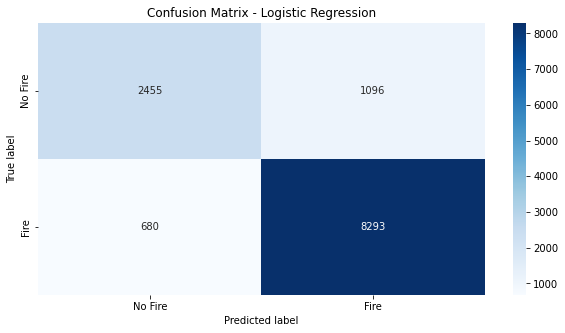

In [34]:
# Check Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_log_reg_test)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['No Fire', 'Fire'], 
            yticklabels = ['No Fire', 'Fire'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

Di matrix ini bisa dilihat seharusnya ada `8973` yang fire, dan model dapat memprediksi sangat baik hanya `680` yang salah prediksi atau hanya miss predict `7.5%`.

## 8.4. Optimised Parameter Logistic Regression

In [35]:
# Mencari Parameter yang paling bagus menggunakan GridSearch

from sklearn.model_selection import GridSearchCV

grid = {'model_log_reg__C' : [0.5, 1, 50],
        'model_log_reg__max_iter' : [1750, 2000],
        'model_log_reg__class_weight' : [None, 'balanced', 0.25],
        'model_log_reg__tol' : [0.0001, 0.01, 0.1]}

grid_search = GridSearchCV(estimator=pipe_log_reg, param_grid=grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model_log_reg',
                                        LogisticRegression())]),
             param_grid={'model_log_reg__C': [0.5, 1, 50],
                         'model_log_reg__class_weight': [None, 'balanced',
                                                         0.25],
                         'model_log_reg__max_iter': [1750, 2000],
                         'model_log_reg__tol': [0.0001, 0.01, 0.1]},
             return_train_score=True)

In [36]:
grid_search.best_params_

{'model_log_reg__C': 50,
 'model_log_reg__class_weight': None,
 'model_log_reg__max_iter': 1750,
 'model_log_reg__tol': 0.0001}

In [37]:
# Training using Logistic Regression Optimised

pipe_log_reg_opt = Pipeline([("scaler", MinMaxScaler()), ("model_log_reg", LogisticRegression(C=50, class_weight=None, max_iter=1750, tol=0.0001))])

In [38]:
# Train the Model

pipe_log_reg_opt.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model_log_reg', LogisticRegression(C=50, max_iter=1750))])

In [39]:
# Predict Train-Set and Test-Set

y_pred_log_reg_train2 = pipe_log_reg_opt.predict(X_train)
y_pred_log_reg_test2 = pipe_log_reg_opt.predict(X_test)

y_pred_log_reg_train2

array([1, 0, 1, ..., 1, 1, 0])

In [40]:
# Display `y_train`

y_train

38275    1
53924    0
6075     1
25644    0
14533    1
        ..
35702    1
26767    0
6618     1
24894    1
29828    1
Name: Fire Alarm, Length: 50096, dtype: int64

## 8.5. Accuracy Score Optimised Model Logistic Regression

In [41]:
# Cek Accuracy Score

from sklearn.metrics import accuracy_score

print('Train Accuracy Score : ', accuracy_score(y_train, y_pred_log_reg_train2))
print('Test Accuracy Score : ', accuracy_score(y_test, y_pred_log_reg_test2))

Train Accuracy Score :  0.8679934525710635
Test Accuracy Score :  0.8629032258064516


Setelah di optimised, model hanya bertambah accuracy scorenya sedikit.

## 8.6. Classification Report Optimised Model Logistic Regression

In [42]:
# Model Evaluation - Test Set

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_log_reg_test2))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      3551
           1       0.89      0.92      0.91      8973

    accuracy                           0.86     12524
   macro avg       0.84      0.82      0.83     12524
weighted avg       0.86      0.86      0.86     12524



Setelah di optimised, recall untuk `No Fire` bertambah bagus accuracynya sekitar `3%`. Dan precision untuk `Fire` bertambah sekitar `1%`.

## 8.7. Confusion Matrix Optimised Model Logistic Regression

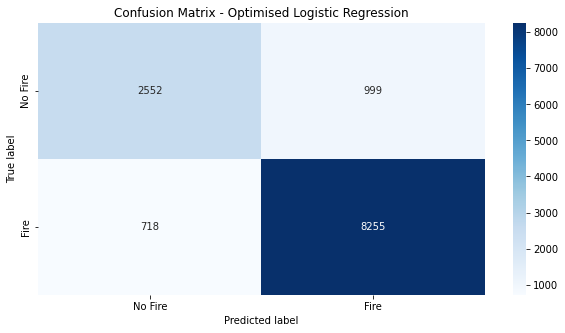

In [43]:
# Print Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_log_reg_test2)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['No Fire', 'Fire'], 
            yticklabels = ['No Fire', 'Fire'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Optimised Logistic Regression")
plt.show()

Di confusion matrixnya, false negative nya bertambah `38`. False positive berkurang `97`, namun tidak sangat berpengaruh ke real case karena akan berjaga-jaga kalau ada fire.

# `SVM`

# 6. Model Definition

In [44]:
# Training using SVM

pipe_svm = Pipeline([("scaler", MinMaxScaler()), ("model_svm", SVC())])

# 7. Model Training

In [45]:
# Train the Model

pipe_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model_svm', SVC())])

# 8. Model Evaluation

In [46]:
# Predict Train-Set and Test-Set

y_pred_svm_train = pipe_svm.predict(X_train)
y_pred_svm_test = pipe_svm.predict(X_test)

y_pred_svm_train

array([1, 0, 1, ..., 1, 1, 1])

In [47]:
# Display `y_train`

y_train

38275    1
53924    0
6075     1
25644    0
14533    1
        ..
35702    1
26767    0
6618     1
24894    1
29828    1
Name: Fire Alarm, Length: 50096, dtype: int64

## 8.1. Acuracy Score

In [48]:
# Cek Accuracy Score

from sklearn.metrics import accuracy_score

print('Train Accuracy Score : ', accuracy_score(y_train, y_pred_svm_train))
print('Test Accuracy Score : ', accuracy_score(y_test, y_pred_svm_test))

Train Accuracy Score :  0.9494770041520281
Test Accuracy Score :  0.9477004152028106


Bisa dilihat model `SVM` bahwa `Train (95%)` dan `Test (95%)` accuracy score nya sama, yang artinya model dapat memprediksi secara benar `95%`. Dan perform jauh lebih bagus dari model `Logistic Regression`.

## 8.2. Classification Report

In [49]:
# Model Evaluation - Test Set

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_svm_test))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      3551
           1       0.94      0.99      0.96      8973

    accuracy                           0.95     12524
   macro avg       0.95      0.92      0.93     12524
weighted avg       0.95      0.95      0.95     12524



Dengan menggunakan model `SVM` kita mendapatkan prediksi `fire` yang `recall` nya di `99%`.

Artinya model dapat memprediksi `99%` yang benar fire, model sangat bagus memprediksi yang benar fire hanya `1%` miss predict.

## 8.3. Confusion Matrix

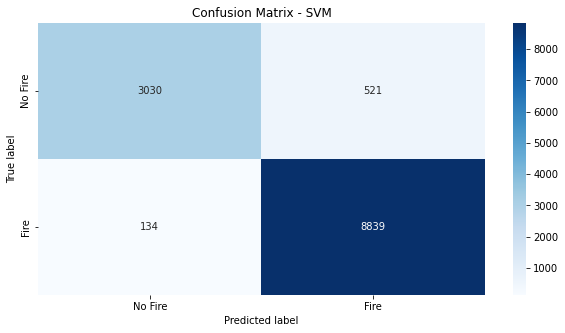

In [50]:
# Check Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_svm_test)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['No Fire', 'Fire'], 
            yticklabels = ['No Fire', 'Fire'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - SVM")
plt.show()

Di matrix ini bisa dilihat seharusnya ada `8973` yang fire, dan model dapat memprediksi sangat baik hanya `134` yang salah prediksi atau hanya miss predict `1.5%`.

# `Random Forest`

# 6. Model Definition

In [51]:
# Training using Random Forest

pipe_rf = Pipeline([("scaler", MinMaxScaler()), ("model_rf", RandomForestClassifier())])

# 7. Model Training

In [52]:
# Train the Model

pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model_rf', RandomForestClassifier())])

# 8. Model Evaluation

In [53]:
# Predict Train-Set and Test-Set

y_pred_rf_train = pipe_rf.predict(X_train)
y_pred_rf_test = pipe_rf.predict(X_test)

y_pred_rf_train

array([1, 0, 1, ..., 1, 1, 1])

In [54]:
# Display `y_train`

y_train

38275    1
53924    0
6075     1
25644    0
14533    1
        ..
35702    1
26767    0
6618     1
24894    1
29828    1
Name: Fire Alarm, Length: 50096, dtype: int64

## 8.1. Accuracy Score

In [55]:
# Cek Accuracy Score

from sklearn.metrics import accuracy_score

print('Train Accuracy Score : ', accuracy_score(y_train, y_pred_rf_train))
print('Test Accuracy Score : ', accuracy_score(y_test, y_pred_rf_test))

Train Accuracy Score :  1.0
Test Accuracy Score :  0.9999201533056531


Model ini `train dan test` accuracy scorenya dapat memprediksi `100%` secara benar. Jauh diatas `1. Logistic Regression (86%)` dan `2. SVM (95%)`

## 8.2. Classification Report

In [56]:
# Model Evaluation - Test Set

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3551
           1       1.00      1.00      1.00      8973

    accuracy                           1.00     12524
   macro avg       1.00      1.00      1.00     12524
weighted avg       1.00      1.00      1.00     12524



Dengan menggunakan model `Random Forest` dengan `base model` kita mendapatkan prediksi dengan accuracy semua `100%`.

Artinya model dapat memprediksi `100%` yang benar fire.

## 8.3. Confusion Matrix

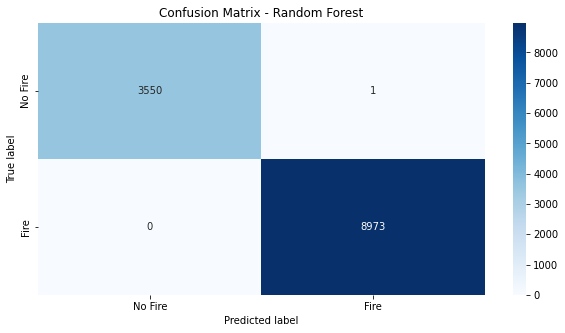

In [57]:
# Check Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf_test)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['No Fire', 'Fire'], 
            yticklabels = ['No Fire', 'Fire'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest")
plt.show()

Model `Random Forest` tidak ada salah prediksi. Dan sejauh ini yang terbaik.

# `Gradient Boosting`

# 6. Model Definition

In [58]:
# Training using Gradient Boosting

pipe_grad_boost = Pipeline([("scaler", MinMaxScaler()), ("model_grad_boost", GradientBoostingClassifier())])

# 7. Model Training

In [59]:
# Train the Model

pipe_grad_boost.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model_grad_boost', GradientBoostingClassifier())])

# 8. Model Evaluation

In [60]:
# Predict Train-Set and Test-Set

y_pred_grad_boost_train = pipe_grad_boost.predict(X_train)
y_pred_grad_boost_test = pipe_grad_boost.predict(X_test)

y_pred_grad_boost_train

array([1, 0, 1, ..., 1, 1, 1])

In [61]:
# Display `y_train`

y_train

38275    1
53924    0
6075     1
25644    0
14533    1
        ..
35702    1
26767    0
6618     1
24894    1
29828    1
Name: Fire Alarm, Length: 50096, dtype: int64

## 8.1. Accuracy Score

In [62]:
# Cek Accuracy Score

from sklearn.metrics import accuracy_score

print('Train Accuracy Score : ', accuracy_score(y_train, y_pred_grad_boost_train))
print('Test Accuracy Score : ', accuracy_score(y_test, y_pred_grad_boost_test))

Train Accuracy Score :  0.9997604599169594
Test Accuracy Score :  0.9995209198339189


Model ini dapat memprediksi `100%` secara benar. Model `Random Forest` dan `Gradient Boosting` dapat memprediksi `100%` benar.

## 8.2. Classification Report

In [63]:
# Model Evaluation - Test Set

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_grad_boost_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3551
           1       1.00      1.00      1.00      8973

    accuracy                           1.00     12524
   macro avg       1.00      1.00      1.00     12524
weighted avg       1.00      1.00      1.00     12524



Dengan menggunakan model `Gradient Boosting` dengan `base model` kita mendapatkan prediksi dengan accuracy semua `100%`.

Artinya model dapat memprediksi `100%` yang benar fire.

## 8.3. Confusion Matrix

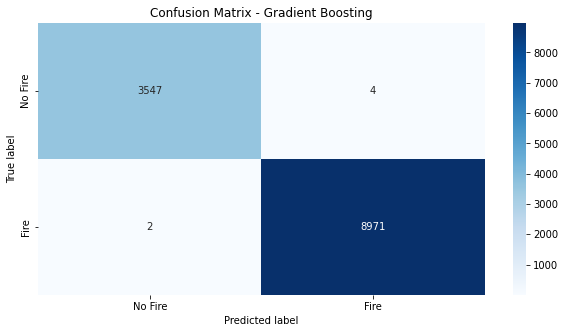

In [64]:
# Check Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_grad_boost_test)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['No Fire', 'Fire'], 
            yticklabels = ['No Fire', 'Fire'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

Di matrix ini bisa dilihat seharusnya ada `8973` yang fire, dan model dapat memprediksi sangat baik hanya `2` yang salah prediksi atau hanya miss predict `0.02%`. Masih model `Random Forest` yang tidak ada salah prediksi di confusion matrix nya.

# 9. Model Saving

In [65]:
# Cek Accuracy Score

from sklearn.metrics import accuracy_score

print('Train Accuracy Score Logistic Regression : ', accuracy_score(y_train, y_pred_log_reg_train))
print('Test Accuracy Score Logistic Regression : ', accuracy_score(y_test, y_pred_log_reg_test))
print('')
print('Train Accuracy Score SVM : ', accuracy_score(y_train, y_pred_svm_train))
print('Test Accuracy Score SVM : ', accuracy_score(y_test, y_pred_svm_test))
print('')
print('Train Accuracy Score Random Forest : ', accuracy_score(y_train, y_pred_rf_train))
print('Test Accuracy Score Random Forest : ', accuracy_score(y_test, y_pred_rf_test))
print('')
print('Train Accuracy Score Gradient Boosting : ', accuracy_score(y_train, y_pred_grad_boost_train))
print('Test Accuracy Score Gradient Boosting : ', accuracy_score(y_test, y_pred_grad_boost_test))

Train Accuracy Score Logistic Regression :  0.86364180772916
Test Accuracy Score Logistic Regression :  0.8581922708399872

Train Accuracy Score SVM :  0.9494770041520281
Test Accuracy Score SVM :  0.9477004152028106

Train Accuracy Score Random Forest :  1.0
Test Accuracy Score Random Forest :  0.9999201533056531

Train Accuracy Score Gradient Boosting :  0.9997604599169594
Test Accuracy Score Gradient Boosting :  0.9995209198339189


Di `Train` dan `Test` accuracy score yang paling bagus modelnya yaitu `Random Forest`.

In [66]:
# Model Evaluation - Test Set

from sklearn.metrics import classification_report

print('Classification Report Logistic Regression : ')
print(classification_report(y_test, y_pred_log_reg_test))

print('Classification Report SVM : ')
print(classification_report(y_test, y_pred_svm_test))

print('Classification Report Random Forest : ')
print(classification_report(y_test, y_pred_rf_test))

print('Classification Report Gradient Boosting : ')
print(classification_report(y_test, y_pred_grad_boost_test))

Classification Report Logistic Regression : 
              precision    recall  f1-score   support

           0       0.78      0.69      0.73      3551
           1       0.88      0.92      0.90      8973

    accuracy                           0.86     12524
   macro avg       0.83      0.81      0.82     12524
weighted avg       0.85      0.86      0.86     12524

Classification Report SVM : 
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      3551
           1       0.94      0.99      0.96      8973

    accuracy                           0.95     12524
   macro avg       0.95      0.92      0.93     12524
weighted avg       0.95      0.95      0.95     12524

Classification Report Random Forest : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3551
           1       1.00      1.00      1.00      8973

    accuracy                           1.00     12524
   macro avg   

Begitu pula di classification report, `Random Forest` model yang paling bagus untuk dipakai.

In [79]:
from sklearn.model_selection import cross_val_score

# Append different models
models = []

# Logistic Regression
models.append(('Logistic Regression',
               LogisticRegression(),'none'))

# SVM
models.append(('SVM',
               SVC(),'none'))

# Random Forest Classifier
models.append(('Random Forest', 
              RandomForestClassifier(), 'none'))

# KNN
models.append(('Gradient Boosting', 
              GradientBoostingClassifier(), 'none'))

# Evaluate each model
results = []
names = []
scoring = 'accuracy'

for name, model, Std in models:      
    if Std == 'none':
        cv_results = cross_val_score(model, X, y, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    else:
        msg = 'Please input model'
        print(msg)

Logistic Regression: 0.714644 (0.000032)
SVM: 0.714644 (0.000032)
Random Forest: 0.942223 (0.058758)
Gradient Boosting: 0.975407 (0.035051)


In [80]:
result = [['Logistic Regression', 0.714644, 0.000032], ['SVM', 0.714644, 0.000032], ['Random Forest', 0.942223, 0.058758], ['Gradient Boosting', 0.975407, 0.035051]]

In [81]:
results = pd.DataFrame(result, columns=['Model', 'Mean', 'Std'])

In [82]:
results

,Model,Mean,Std
0,Logistic Regression,0.714644,0.000032
1,SVM,0.714644,0.000032
2,Random Forest,0.942223,0.058758
3,Gradient Boosting,0.975407,0.035051


Model terbaik yang akan dipilih yaitu `Random Forest`.

In [68]:
# Save the Files

import joblib
import json

with open('pipe_rf.pkl', 'wb') as file_1:
  joblib.dump(pipe_rf, file_1)

# 10. Model Inference

## 10.1. Load Model

In [69]:
# Load All Files

import joblib
import json 

with open('pipe_rf.pkl', 'rb') as file_1:
  pipe_rf = joblib.load(file_1)

## 10.2. Inferencing

In [70]:
# Display Inference-Set 

data_inf

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,55506,1654716551,47.460,26.61,12226,438,12797,19186,936.893,0.76,0.79,5.25,0.818,0.018,4364,0
1,57375,1655124797,21.396,45.76,49,400,12828,20712,937.530,2.19,2.27,15.06,2.348,0.053,489,0
2,18511,1654751842,20.067,47.30,1295,433,12894,19409,938.742,1.67,1.73,11.48,1.790,0.040,18511,1
3,9592,1654742923,-4.624,58.15,718,707,12782,19548,939.174,2.19,2.28,15.09,2.353,0.053,9592,1
4,53386,1654714431,27.560,47.22,97,400,12811,20624,937.343,1.84,1.91,12.64,1.970,0.045,2244,0
5,929,1654734260,27.059,51.24,0,400,13019,19934,939.754,0.25,0.26,1.74,0.272,0.006,929,0
6,32742,1654769091,18.380,56.08,292,400,13117,19970,939.415,0.39,0.41,2.72,0.424,0.010,7748,1
7,38394,1654774743,27.020,47.25,1164,529,12841,19438,938.882,1.62,1.68,11.16,1.740,0.039,13400,1
8,34370,1654770719,19.610,65.53,628,558,12862,19634,939.210,2.49,2.59,17.15,2.674,0.060,9376,1
9,35570,1654771919,23.390,55.31,967,680,12791,19503,939.097,2.34,2.43,16.10,2.511,0.057,10576,1


In [71]:
data_inf_2 = data_inf.drop(['Fire Alarm'], axis=1)

In [72]:
data_inf_2 = data_inf_2[['Temperature[C]',
 'Humidity[%]',
 'TVOC[ppb]',
 'Raw Ethanol',
 'Pressure[hPa]']]

data_inf_2

,Temperature[C],Humidity[%],TVOC[ppb],Raw Ethanol,Pressure[hPa]
0,47.460,26.61,12226,19186,936.893
1,21.396,45.76,49,20712,937.530
2,20.067,47.30,1295,19409,938.742
3,-4.624,58.15,718,19548,939.174
4,27.560,47.22,97,20624,937.343
5,27.059,51.24,0,19934,939.754
6,18.380,56.08,292,19970,939.415
7,27.020,47.25,1164,19438,938.882
8,19.610,65.53,628,19634,939.210
9,23.390,55.31,967,19503,939.097


In [73]:
# Predict using Random Forest

y_pred_inf_rf = pipe_rf.predict(data_inf_2)
y_pred_inf_rf

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1])

In [74]:
# Create DataFrame of Fire Alarm's Prediction

y_pred_inf_data_rf = pd.DataFrame(y_pred_inf_rf, columns=['Fire Alarm Prediction'])
y_pred_inf_data_rf

,Fire Alarm Prediction
0,0
1,0
2,1
3,1
4,0
5,0
6,1
7,1
8,1
9,1


In [75]:
# Concate between Inference-Set and Fire Alarm's Prediction

data_inf = pd.concat([data_inf, y_pred_inf_data_rf], axis=1)
data_inf

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm,Fire Alarm Prediction
0,55506,1654716551,47.460,26.61,12226,438,12797,19186,936.893,0.76,0.79,5.25,0.818,0.018,4364,0,0
1,57375,1655124797,21.396,45.76,49,400,12828,20712,937.530,2.19,2.27,15.06,2.348,0.053,489,0,0
2,18511,1654751842,20.067,47.30,1295,433,12894,19409,938.742,1.67,1.73,11.48,1.790,0.040,18511,1,1
3,9592,1654742923,-4.624,58.15,718,707,12782,19548,939.174,2.19,2.28,15.09,2.353,0.053,9592,1,1
4,53386,1654714431,27.560,47.22,97,400,12811,20624,937.343,1.84,1.91,12.64,1.970,0.045,2244,0,0
5,929,1654734260,27.059,51.24,0,400,13019,19934,939.754,0.25,0.26,1.74,0.272,0.006,929,0,0
6,32742,1654769091,18.380,56.08,292,400,13117,19970,939.415,0.39,0.41,2.72,0.424,0.010,7748,1,1
7,38394,1654774743,27.020,47.25,1164,529,12841,19438,938.882,1.62,1.68,11.16,1.740,0.039,13400,1,1
8,34370,1654770719,19.610,65.53,628,558,12862,19634,939.210,2.49,2.59,17.15,2.674,0.060,9376,1,1
9,35570,1654771919,23.390,55.31,967,680,12791,19503,939.097,2.34,2.43,16.10,2.511,0.057,10576,1,1


Dari total `10` sample data, tidak ada yang salah prediksi dengan menggunakan model terbagus yaitu `Random Forest`.

# 11. Kesimpulan

Model terbaik dalam urutan yaitu :

1. Random Forest
2. Gradient Boosting
3. SVM
4. Logistic Regression

Dimana model `Random Forest` adalah yang terbaik dan bisa digunakan untuk menyelesaikan objective yaitu `Smoke Detection Test` dengan memprediksi secara benar `100%`.